In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr
from scipy import signal as sig
from scipy.io import loadmat

In [2]:
%matplotlib inline

In [3]:
#open data
raw_training_data = loadmat('..\\raw_training_data.mat')

In [4]:
#glove data for training - per subject
train_dg_s1 = raw_training_data['train_dg'][0][0]
train_dg_s2 = raw_training_data['train_dg'][1][0]
train_dg_s3 = raw_training_data['train_dg'][2][0]

In [5]:
train_dg_s1_downsample = train_dg_s1[::50][:-1]
train_dg_s2_downsample = train_dg_s2[::50][:-1]
train_dg_s3_downsample = train_dg_s3[::50][:-1]

In [6]:
file_s1 = open("all_feats_s1_train_fx.npy", "rb")
feats_s1_train = np.load(file_s1)
file_s1.close()

file_s2 = open("all_feats_s2_train_fx.npy", "rb")
feats_s2_train = np.load(file_s2)
file_s2.close()

file_s3 = open("all_feats_s3_train_fx.npy", "rb")
feats_s3_train = np.load(file_s3)
file_s3.close()

## Prediction Interpolation

In [7]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [8]:
def repeat_preds(preds, window_to_time_ratio=50):
    pred_all = []
    for row in preds:
        for i in range(window_to_time_ratio):
            pred_all.append(row)

    # For out problem, it is short 50 entries, so add the last row 50 more times
    for i in range(window_to_time_ratio):
        pred_all.append(row)
    
    return np.array(pred_all)

def interp_preds(preds, time_length):
    # N samples
    preds_sample_orig = np.arange(len(preds))
    
    # T time points
    preds_sample_target = np.arange(time_length)
    
    preds = preds.transpose()

    preds_interp = []
    
    for finger_preds in preds:
        f = interp1d(preds_sample_orig, finger_preds)
        new_preds = f(preds_sample_target)
        preds_interp.append(new_preds)
    
    preds_interp = np.array(preds_interp).transpose()
    
    return preds_interp

def spline_preds(preds, time_length):
    # N samples
    preds_sample_orig = np.arange(len(preds))
    
    # T time points
    preds_sample_target = np.linspace(0,len(preds),time_length)
    print(preds_sample_target)
    preds = preds.transpose()

    preds_interp = []
    
    for finger_preds in preds:
        f = CubicSpline(preds_sample_orig, finger_preds)
        new_preds = f(preds_sample_target)
        preds_interp.append(new_preds)
    
    preds_interp = np.array(preds_interp).transpose()
    
    return preds_interp

def compute_corr(preds, truth):
    subj_corr = []
    for i in range(5):
        finger_pred = preds.transpose()[i]
        finger_truth = truth.transpose()[i]
        subj_corr.append(pearsonr(finger_pred, finger_truth)[0])
    
    return subj_corr

## Subject 1

In [9]:
reg_rfr_s1 = pickle.load(open('subject1_rfr_1000.model', 'rb'))
pred_s1 = reg_rfr_s1.predict(feats_s1_train)

C:\Users\frede\anaconda3\envs\shenlab\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\frede\anaconda3\envs\shenlab\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [10]:
pred_s1_repeat = repeat_preds(pred_s1, 50)
#pred_s1_interp = repeat_preds(pred_s1, len(train_dg_s1))
print(pred_s1_repeat.shape)
#print(pred_s1_interp.shape)
print(train_dg_s1.shape)

(300000, 5)
(300000, 5)


In [11]:
# plt.scatter(train_dg_s1.transpose()[0], pred_s1_repeat.transpose()[0], s=3)
# plt.scatter(train_dg_s1.transpose()[1], pred_s1_repeat.transpose()[1], s=3)
# plt.scatter(train_dg_s1.transpose()[2], pred_s1_repeat.transpose()[2], s=3)
# plt.scatter(train_dg_s1.transpose()[3], pred_s1_repeat.transpose()[3], s=3)
# plt.scatter(train_dg_s1.transpose()[4], pred_s1_repeat.transpose()[4], s=3)


In [12]:
subj1_corr = compute_corr(pred_s1_repeat, train_dg_s1)
print(subj1_corr)

[0.8509975940194416, 0.8678952133705385, 0.8508496019190802, 0.8523504060311978, 0.8563484006033477]


## Subject 2

In [13]:
reg_rfr_s2 = pickle.load(open('subject2_rfr_1000.model', 'rb'))
pred_s2 = reg_rfr_s2.predict(feats_s2_train)

C:\Users\frede\anaconda3\envs\shenlab\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\frede\anaconda3\envs\shenlab\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [14]:
pred_s2_repeat = repeat_preds(pred_s2, 50)
#pred_s1_interp = repeat_preds(pred_s1, len(train_dg_s1))
print(pred_s2_repeat.shape)
#print(pred_s1_interp.shape)
print(train_dg_s2.shape)

(300000, 5)
(300000, 5)


In [15]:
# plt.scatter(train_dg_s2.transpose()[0], pred_s2_repeat.transpose()[0], s=3)
# plt.scatter(train_dg_s2.transpose()[1], pred_s2_repeat.transpose()[1], s=3)
# plt.scatter(train_dg_s2.transpose()[2], pred_s2_repeat.transpose()[2], s=3)
# plt.scatter(train_dg_s2.transpose()[3], pred_s2_repeat.transpose()[3], s=3)
# plt.scatter(train_dg_s2.transpose()[4], pred_s2_repeat.transpose()[4], s=3)


In [16]:
subj2_corr = compute_corr(pred_s2_repeat, train_dg_s2)
print(subj2_corr)

[0.8927546760119947, 0.8704563742705207, 0.8803957176961519, 0.8721810378991721, 0.8759741930241788]


## Subject 3

In [17]:
reg_rfr_s3 = pickle.load(open('subject3_rfr_1000.model', 'rb'))
pred_s3 = reg_rfr_s3.predict(feats_s3_train)

C:\Users\frede\anaconda3\envs\shenlab\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\frede\anaconda3\envs\shenlab\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [18]:
pred_s3_repeat = repeat_preds(pred_s3, 50)
#pred_s1_interp = repeat_preds(pred_s1, len(train_dg_s1))
print(pred_s3_repeat.shape)
#print(pred_s1_interp.shape)
print(train_dg_s3.shape)

(300000, 5)
(300000, 5)


In [19]:
# plt.scatter(train_dg_s3.transpose()[0], pred_s3_repeat.transpose()[0], s=3)
# plt.scatter(train_dg_s3.transpose()[1], pred_s3_repeat.transpose()[1], s=3)
# plt.scatter(train_dg_s3.transpose()[2], pred_s3_repeat.transpose()[2], s=3)
# plt.scatter(train_dg_s3.transpose()[3], pred_s3_repeat.transpose()[3], s=3)
# plt.scatter(train_dg_s3.transpose()[4], pred_s3_repeat.transpose()[4], s=3)


In [20]:
subj3_corr = compute_corr(pred_s3_repeat, train_dg_s3)
print(subj3_corr)

[0.8978521447564057, 0.8819424136601375, 0.884203991853101, 0.8921962863843796, 0.8916418227539928]


# Predict Leaderboard

In [21]:
file_s1 = open("all_feats_s1_test_fx.npy", "rb")
feats_s1_test = np.load(file_s1)
file_s1.close()

file_s2 = open("all_feats_s2_test_fx.npy", "rb")
feats_s2_test = np.load(file_s2)
file_s2.close()

file_s3 = open("all_feats_s3_test_fx.npy", "rb")
feats_s3_test = np.load(file_s3)
file_s3.close()

In [22]:
pred_s1_test = reg_rfr_s1.predict(feats_s1_test)
pred_s1_test_repeat = repeat_preds(pred_s1_test, 50)

print(pred_s1_test_repeat.shape)

pred_s2_test = reg_rfr_s2.predict(feats_s2_test)
pred_s2_test_repeat = repeat_preds(pred_s2_test, 50)

print(pred_s2_test_repeat.shape)

pred_s3_test = reg_rfr_s3.predict(feats_s3_test)
pred_s3_test_repeat = repeat_preds(pred_s3_test, 50)

print(pred_s3_test_repeat.shape)


(147500, 5)
(147500, 5)
(147500, 5)


In [46]:
pred_s1_test_spline = spline_preds(pred_s1_test, 147500)
pred_s1_test_spline[-50:] = pred_s1_test[-1] # The last 50 entries of the spline are screwed up
pred_s2_test_spline = spline_preds(pred_s2_test, 147500)
pred_s2_test_spline[-50:] = pred_s2_test[-1]
pred_s3_test_spline = spline_preds(pred_s3_test, 147500)
pred_s3_test_spline[-50:] = pred_s3_test[-1]

[0.00000000e+00 1.99933559e-02 3.99867118e-02 ... 2.94896001e+03
 2.94898001e+03 2.94900000e+03]
[0.00000000e+00 1.99933559e-02 3.99867118e-02 ... 2.94896001e+03
 2.94898001e+03 2.94900000e+03]
[0.00000000e+00 1.99933559e-02 3.99867118e-02 ... 2.94896001e+03
 2.94898001e+03 2.94900000e+03]


In [24]:
print(pred_s1_test)
print(pred_s1_test_spline)


[[-0.04091421  0.48545975 -0.07371311 -0.34327264 -0.01332183]
 [ 0.09499978  0.13051456  0.07991981 -0.03064465  0.15921677]
 [-0.0180835  -0.04047745  0.00453906 -0.01022392  0.02311694]
 ...
 [-0.28334525  0.05703866 -0.04816816  0.19054964  0.08246329]
 [-0.12864375 -0.10058436  0.79921624  0.21573099 -0.18461104]
 [-0.22778799  0.06357246  0.64529431  0.21631655  0.02661535]]
[[-4.09142056e-02  4.85459754e-01 -7.37131090e-02 -3.43272637e-01
  -1.33218250e-02]
 [-3.47320483e-02  4.85968228e-01 -6.43571903e-02 -3.34249569e-01
  -1.91130672e-03]
 [-2.87115485e-02  4.85980294e-01 -5.53376235e-02 -3.25337846e-01
   9.07671314e-03]
 ...
 [-1.06102389e+00  1.36588868e+00 -2.75959812e+00  1.72731599e-01
   1.56975630e+00]
 [-1.08953979e+00  1.41079580e+00 -2.88055112e+00  1.71217864e-01
   1.62205304e+00]
 [-1.11858282e+00  1.45654945e+00 -3.00387827e+00  1.69676385e-01
   1.67530012e+00]]


In [38]:
print(len(pred_s2_test)*50)

147450


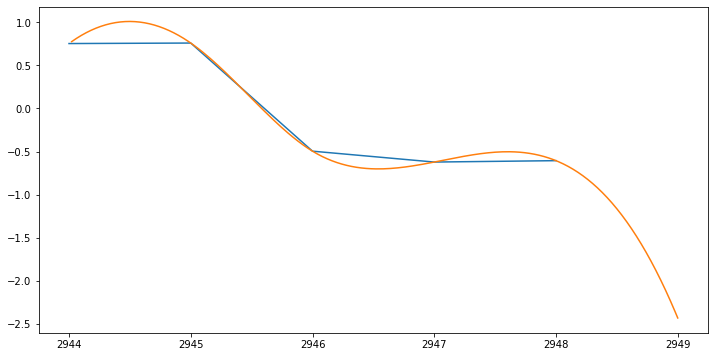

In [45]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(pred_s2_test))[-5:], pred_s2_test.transpose()[0][-5:])
plt.plot(np.linspace(0,len(pred_s2_test),147500)[-250:], pred_s2_test_spline.transpose()[0][-250:])

In [26]:
print(np.sum(np.isnan(pred_s1_test_repeat)))
print(np.sum(np.isnan(pred_s2_test_repeat)))
print(np.sum(np.isnan(pred_s3_test_repeat)))


0
0
0


In [27]:
from scipy.io import savemat

In [28]:
predictions_array = np.zeros((3,1), dtype=object)
predictions_array[0,0] = pred_s1_test_repeat
predictions_array[1,0] = pred_s2_test_repeat
predictions_array[2,0] = pred_s3_test_repeat


In [29]:
savemat('predictions.mat', {'predicted_dg':predictions_array})

In [30]:
predictions_array_spline = np.zeros((3,1), dtype=object)
predictions_array_spline[0,0] = pred_s1_test_spline
predictions_array_spline[1,0] = pred_s2_test_spline
predictions_array_spline[2,0] = pred_s3_test_spline

savemat('predictions_v2.mat', {'predicted_dg':predictions_array_spline})